### Image Source
[Humming_Bird](https://unsplash.com/photos/T7BgXyf7JNY)

### Import Libraries and Read the Image

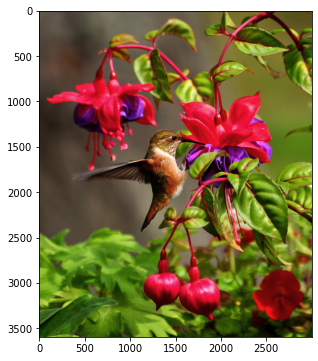

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('hm.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(image)

In [2]:
image.shape

(3595, 3000, 3)

In [3]:
pixel_vals = image.reshape((-1,3))
pixel_vals

array([[92, 89, 74],
       [92, 89, 74],
       [94, 88, 74],
       ...,
       [19, 40,  1],
       [19, 40,  1],
       [20, 41,  2]], dtype=uint8)

In [4]:
def plot_image(columns=3,rows=1,K=[3,4,5],iter=100,epsilon=0.85,figsize=(20, 20)):
  '''
  Function will return the segmented images for different
  values of K
  Parameters
  ------------
  columns: int, default=3
    No of columns
  
  rows: int, default=1
    No of rows, if columns=3 and rows=1 then function will subplot 3 images

  K: list, default=[3, 4, 5]
    Change the value of K according to no of rows and columns.
    e.g if K = [3, 4] then columns=2 and rows=1 or vice versa
  
  iter: int, default=100
  No of iteration to achieve criteria

  epsilon: float, default=0.85(85%)

  figsize: tupple, default=(20, 20)

  '''
  # Reshape the image to 2D array
  pixel_vals = image.reshape((-1,3))

  # Convert it to float32
  pixel_vals = np.float32(pixel_vals)
  
  # criteria is used for iteration termination and it will stop when criteria is satisfied
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iter, epsilon)
  columns = columns
  rows = rows
  fig=plt.figure(figsize=figsize)
  K = K
  for i in range(1, len(K) +1):

    retval, labels, centers = cv2.kmeans(pixel_vals, K[i-1], None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    fig.add_subplot(rows, columns, i)

    plt.title('Image Segmentation with K = {}'.format(K[i-1]))
    plt.imshow(segmented_image)
  return plt.show()


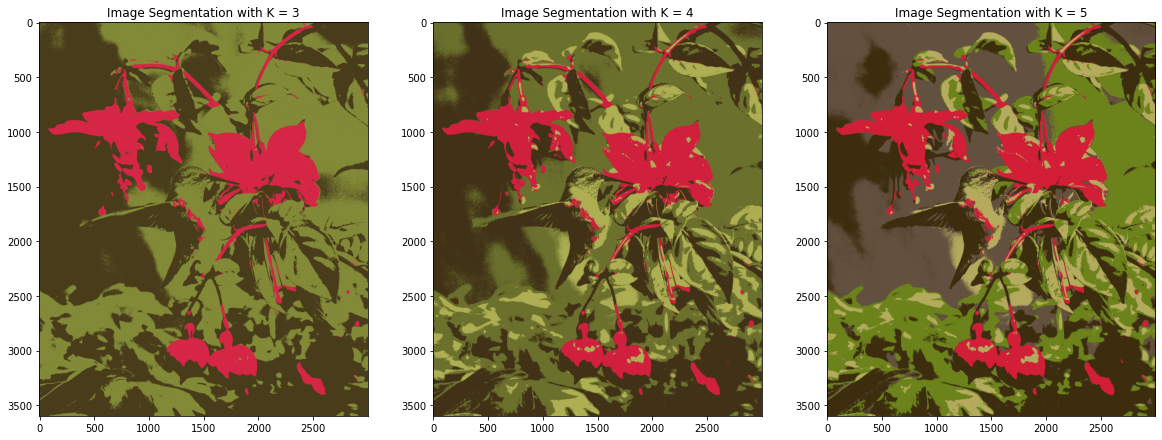

In [5]:
plot_image()

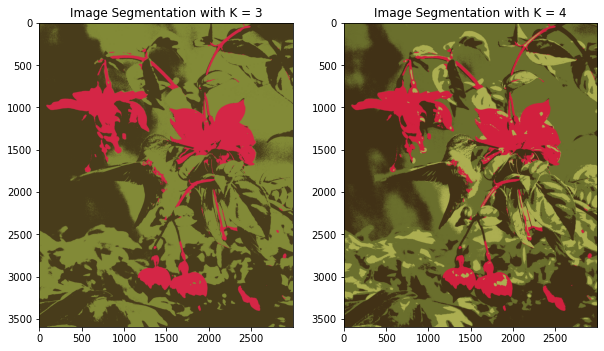

In [6]:
plot_image(columns=2,rows=1,K=[3,4],iter=100,epsilon=0.85,figsize=(10,10))